In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from ReadCameraModel import ReadCameraModel
from UndistortImage import *
from cv2 import *
import random

In [3]:
fx,fy,cx,cy, G_camera_image, LUT = ReadCameraModel('./model')

In [4]:
print(fx,fy,cx,cy, G_camera_image, LUT)

964.828979 964.828979 643.788025 484.40799 [[ 0. -0.  1.  0.]
 [ 1.  0. -0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]] [[  76.703285   58.942936]
 [  77.410446   58.81277 ]
 [  78.11823    58.682644]
 ...
 [1204.5255    908.75836 ]
 [1205.2394    908.6305  ]
 [1205.9525    908.50256 ]]


In [5]:
path = r'C:\Users\12027\PyCharm_Projects\Visual_Odometry\Oxford_dataset\stereo\centre\*.png'

filenames = [img for img in glob.glob(path)]
# filenames = [img for img in glob.glob("/home/srujan/PycharmProjects/visual_odometry/samples/*.png")]

filenames.sort()
image_list =[]
for img in filenames:
    image_list.append(img)

In [6]:
# path = r'C:\Users\12027\PyCharm_Projects\Visual_Odometry\Oxford_dataset\stereo\centre\*.png'
# data = []
# for f1 in glob.glob(path):
#     img = cv2.imread(f1,0)
#     color_image = cv2.cvtColor(img, cv2.COLOR_BayerGR2BGR)
#     undistorted_image = UndistortImage(color_image,LUT)
#     gray_image = cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2GRAY)
#     data.append(undistorted_image)

# KeyPoint Algo

In [104]:
def sift(img1,img2):
    
    gray_img1 = img1 
    gray_img2 = img2 
    
#     gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#     gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
                                  
    sift = cv2.xfeatures2d.SIFT_create()     #create sift features
    
    #Key Points and Descriptors for the corresponding images
    kp1,des1 = sift.detectAndCompute(gray_img1,None)
    kp2,des2 = sift.detectAndCompute(gray_img2,None)
    
    # FLANN parameters
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)
    
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    
    matchesMask = [[0,0] for i in range(len(matches))]

    
    #-- Filter matches using the Lowe's ratio test
    ratio_thresh = 0.5
    good_matches = [] 
    src_points=[]
    dst_points= []
    for i,(m,n) in enumerate(matches):
        if m.distance < ratio_thresh * n.distance:
            matchesMask[i]=[1,0]
            src_points.append(kp1[m.queryIdx].pt)
            dst_points.append(kp2[m.trainIdx].pt)
  
    
    draw_params = dict(matchColor = (0,255,0),
                       singlePointColor = (255,0,0),
                       matchesMask = matchesMask,
                       flags = cv2.DrawMatchesFlags_DEFAULT)
    img3 = cv2.drawMatchesKnn(gray_img1,kp1,gray_img2,kp2,matches,None,**draw_params)
    
    src_points = np.asarray(src_points)
#     print(src_points)
    dst_points = np.asarray(dst_points)
#     print(dst_points)

    ones = np.ones((len(src_points),1),dtype = np.int8) 
    src_points=np.column_stack((src_points,ones))
    dst_points=np.column_stack((dst_points,ones))

   
   

    plt.imshow(img3)
#     print(src_points)
#     print(dst_points)
    
    return src_points,dst_points



In [55]:
a = cv2.imread(r'C:\Users\12027\PyCharm_Projects\Visual_Odometry\58d919eaf2d0331b008b4bbd.jpg')
b = cv2.imread(r'C:\Users\12027\PyCharm_Projects\Visual_Odometry\hith-eiffel-tower-iStock_000016468972Large.jpg')

[[461.17492676 604.24755859   1.        ]
 [467.08081055 607.18170166   1.        ]
 [473.34133911 599.43127441   1.        ]
 [477.88952637 586.3168335    1.        ]
 [482.45205688 595.88751221   1.        ]
 [482.45205688 595.88751221   1.        ]
 [496.91699219 591.17907715   1.        ]
 [502.92819214 589.52606201   1.        ]
 [523.15655518 427.00906372   1.        ]
 [587.48913574 591.4296875    1.        ]
 [602.10620117 595.87890625   1.        ]
 [603.40216064 589.30328369   1.        ]
 [605.88977051 590.33050537   1.        ]
 [611.15856934 599.72210693   1.        ]
 [611.93664551 639.97875977   1.        ]
 [630.43096924 585.31213379   1.        ]]
[[1.20001074e+03 1.39272473e+03 1.00000000e+00]
 [1.21262769e+03 1.40065857e+03 1.00000000e+00]
 [1.22633472e+03 1.38157361e+03 1.00000000e+00]
 [1.23821082e+03 1.35452332e+03 1.00000000e+00]
 [1.25025269e+03 1.37645837e+03 1.00000000e+00]
 [1.25025269e+03 1.37645837e+03 1.00000000e+00]
 [1.28528418e+03 1.36592651e+03 1.00000

(<matplotlib.image.AxesImage at 0x27206131588>,
 array([[461.17492676, 604.24755859,   1.        ],
        [467.08081055, 607.18170166,   1.        ],
        [473.34133911, 599.43127441,   1.        ],
        [477.88952637, 586.3168335 ,   1.        ],
        [482.45205688, 595.88751221,   1.        ],
        [482.45205688, 595.88751221,   1.        ],
        [496.91699219, 591.17907715,   1.        ],
        [502.92819214, 589.52606201,   1.        ],
        [523.15655518, 427.00906372,   1.        ],
        [587.48913574, 591.4296875 ,   1.        ],
        [602.10620117, 595.87890625,   1.        ],
        [603.40216064, 589.30328369,   1.        ],
        [605.88977051, 590.33050537,   1.        ],
        [611.15856934, 599.72210693,   1.        ],
        [611.93664551, 639.97875977,   1.        ],
        [630.43096924, 585.31213379,   1.        ]]),
 array([[1.20001074e+03, 1.39272473e+03, 1.00000000e+00],
        [1.21262769e+03, 1.40065857e+03, 1.00000000e+00],
  

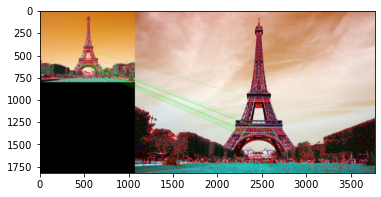

In [85]:
sift(a,b)

# Check KeyPoint Algo


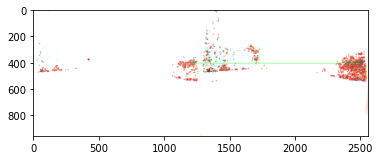

In [105]:

for i in range(2,9):
    
    img1= cv2.imread(image_list[i],0)
    img2=cv2.imread(image_list[i+1],0)
    
    color_image1 = cv2.cvtColor(img1, cv2.COLOR_BayerGR2BGR)
    undistorted_image1 = UndistortImage(color_image1,LUT)

    
    color_image2 = cv2.cvtColor(img2, cv2.COLOR_BayerGR2BGR)
    undistorted_image2 = UndistortImage(color_image2,LUT)
#     print(undistorted_image1)
    
#     sift(undistorted_image1,undistorted_image2)
    sift(color_image1,color_image2)


    


# Fundamental Matrix

In [11]:
def fundamental_matrix(pt1,pt2):
    
    A = []
    for i in range(len(pt1)):
        x_1 = pt1[i][0]
        y_1 = pt1[i][1]
        x_2 = pt2[i][0]
        y_2 = pt2[i][1]
        
        r = [x_1 * x_2, x_1 *y_2, x_1, y_1*x_2, y_1*y_2, y_1, x_2, y_2, 1]
        
        A.append(r)
    
    A = np.asarray(A)
    U, S, V = np.linalg.svd(A)
    est_funda= V[:,-1]
    Est_Fundamental_Matrix = np.reshape(est_funda,(3,3))
    
    #Enforcing Rank 2 Constraint
    U1,S1,V1 = np.linalg.svd(Est_Fundamental_Matrix)
    diag_s = np.diag(S1) 
    diag_s[2][2] = 0

    F =np.multiply(U1, diag_s,np.transpose(V1))
#     print(np.linalg.matrix_rank(fundamental_matrix(pt1,pt2)))
        
    return F
        
    
    

In [12]:
a = [[1,2],[2,3],[4,5]]
a= np.asarray(a)

d= (np.random.choice(a.shape[0],size=1))
random_rows =a[d, :]
print(random_rows)

[[2 3]]


# Match Outliers using RANSAC

In [178]:

def RANSAC(src_points,dst_points):

    n = 0
    N= 8
    thershold = 0.5
    inliers =[]
    
    for i in range(1,100):
        
        rand_points = random.sample(range(0,len(src_points),8))

#         #selecting 8 random correspondece points
#         rnd1 = np.random.choice(src_points[0],8)
# #         rnd1 = src_points[np.int(rnd1),:]

#         rnd2 = np.random.choice(dst_points[0],8)
# #         rnd2 = dst_points[np.int(rnd2),:]
        
        #Fundamental matrix
        
        F_est = fundamental_matrix(src_points(rnd1),dst_points(rnd2))
        s = 0
        
        for j in range(8):
            
  #             print((rnd2[j].shape))
            
            if abs(np.multiply(np.transpose(rnd2[j]), np.multiply(F_est,rnd1[j]))).any() < thershold:
                           
                           s.append([rnd1[j],rnd2[j]])   

        if n < abs(s):

            n= abs(s)
            inliers = s
            
            print('ils',inliers)
            print(s)

    return inliers, s



In [182]:
random.sample(range(0,100),8)

[56, 54, 66, 28, 58, 71, 42, 15]

In [171]:
w = [[1,2],[3,4],[4,5],[5,6],[7,8],[6,5],[9,6],[2,8]]
w= np.asarray(w)
np.random.choice(w[0],8)

# a= np.append(a,np.ones([len(a),1],dtype = np.int8),1)
# # print(a)

# b = [[4,2],[7,4],[6,5],[9,6],[2,8],[1,2],[3,4],[4,5]]
# b= np.asarray(b)
# b= np.append(b,np.ones([len(b),1],dtype = np.int8),1,)

# g = np.asarray([[a],[b]])
# g= np.array(g)

# print((g))


array([1, 1, 1, 2, 2, 1, 1, 2])

# Calibration Matrix

In [15]:
K = np.array([[fx,0,cx],
            [0,fy,cy],
            [0,0,1]])

# Essential Matrix

In [16]:
def essential_matrix(calibration_mat, Fundamental_mat):
    
    ess_mat = np.multiply (np.transpose(calibration_mat), Fundamental_mat, calibration_mat)
    
    return ess_mat

In [17]:
m = essential_matrix(K,d)
U,D,V =  np.linalg.svd(m)
# print('U', U)
print(U[:,2])

[-0.51216897 -0.38537334  0.76757432]


# Camera Pose

In [18]:
def camera_pose(calibration_mat, Fundamental_mat):
    
    est_mat = essential_matrix(calibration_mat, Fundamental_mat)
    U,D,V =  np.linalg.svd(est_mat)
    W = np.array([[0,-1,0],
                 [1,0,0]
                 [0,0,1]])
    
    c1 =  U[:,2]
    r1 = np.multiply( U, W, np.transpose(V))
    
    c2 =  -U[:,2]
    r2 = np.multiply( U, W, np.transpose(V))
    
    c3 =  U[:,2]
    r3 = np.multiply( U, np.transpose(W), np.transpose(V))
    
    c4 =  -U[:,2]
    r4 = np.multiply( U, np.transpose(W), np.transpose(V))
    
    R =[r1,r2,r3,r4]
    C = [c1,c2,c3,c4]
    
    for i in range(1,5):
        
        if np.linalg.det(R[i]) == -1:
            
            C[i] = -C[i]
            R[i] = -R[i]
            
    return [r1,r2,r3,r4], [c1,c2,c3,c4]
            

In [19]:
h = np.eye(4)
h = h[-1]
n_x = h/h[3]

In [20]:
n_x[0:3]

array([0., 0., 0.])

# Linear Traingulation

In [21]:
def linearTriangulation(k,r1,r2,x1,x2,c1,c2):
    
    ''' Given Two Camera Poses we must estimate the 3D Point X projected to x and y
        x1: Correspondimg first image coordinate
        x2: Corresponding second image coordinate
        k: Camera Clibration Matrix
        P1, P2 = Camera Poses 
    '''
    
    p1 = np.multiply(k, r1, np.concatenate(np.eye(3),-c1))
    p2 = np.multiply(k, r2, np.concatenate(np.eye(3),-c2))

                     
#     for i in range(len(x1)-1):

    D = [x1[0] * p1[2,:] - p1[0,:],
         x2[0] * p1[2,:] - p1[1,:],
         x1[1] * p2[2,:] - p2[0,:],
         x2[0] * p2[2,:] - p2[1,:]]

    D = np.asarray([D])

    # For the least square error performing the SVD

    S1, U1, V1 = np.linalg.svd(D)

    # Corresponding triangulation point X

    X = V1[:,3]

    #Converting to homogeneous coordinates ( Removing last element from the row)
    w= X /X[3]

    X = w.reshape((4,1))

    X = new_x[0:3].reshape((3,1))
        
    return new_x
    

In [22]:

def obtainEulerAngles(rot_mat) :
    eu1 = math.sqrt(rot_mat[0,0] * rot_mat[0,0] +  rot_mat[1,0] * rot_mat[1,0])
    singular_val = eu1 < 1e-6
 
    if  not singular_val :
        x = math.atan2(rot_mat[2,1] , rot_mat[2,2])
        y = math.atan2(-rot_mat[2,0], eu1)
        z = math.atan2(rot_mat[1,0], rot_mat[0,0])

    else :
        x = math.atan2(-rot_mat[1,2], rot_mat[1,1])
        y = math.atan2(-rot_mat[2,0], eu1)
        z = 0
    return np.array([x*180/math.pi, y*180/math.pi, z*180/math.pi])

In [23]:
#In order to find correct unique camera pose we need to remove disambuigity


def disambiguiousPose(RotationMatrix, CameraCenter, features1, features2):
    check = 0
    Horigin = np.identity(4)
    for index in range(0, len(RotationMatrix)):
        angles = obtainEulerAngles(RotationMatrix[index])
        if angles[0] < 50 and angles[0] > -50 and angles[2] < 50 and angles[2] > -50:
            count = 0
            newP = np.hstack((RotationMatrix[index], CameraCenter[index]))
            for i in range(0, len(features1)):
                temp1x = linearTriangulation(Horigin[0:3,:], newP, features1[i], features2[i])
                thirdrow = RotationMatrix[index][2,:].reshape((1,3))
                if np.squeeze(thirdrow @ (temp1x - CameraCenter[index])) > 0: 
                    count = count + 1
            if count > check:
                check = count
                Translation_final = CameraCenter[index]
                Rotation_final = RotationMatrix[index]
                
    if Translation_final[2] > 0:
        Translation_final = -Translation_final
                
    return Rotation_final, Translation_final
    

ValueError: Sample larger than population or is negative

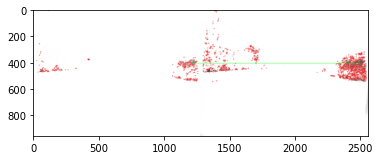

In [186]:
if __name__ == '__main__':
    
    for img in range(20, 50):
        
        img1 = cv2.imread(image_list[img],0)
        color_img1 = cv2.cvtColor(img1 , cv2.COLOR_BayerGR2BGR)
        gray_img1 = cv2.cvtColor(color_image1,cv2.COLOR_BGR2GRAY)
        
        img2 = cv2.imread(image_list[img +1],0)
        color_img2 = cv2.cvtColor(img2 , cv2.COLOR_BayerGR2BGR)
        gray_img2 = cv2.cvtColor(color_image2,cv2.COLOR_BGR2GRAY)
        
        src_pnts, dst_pnts = sift(gray_img1,gray_img2)
        rand_points=random.sample(range(0,len(src_pnts[0])),8)
        print(rand_points)

        
        
#         print('for image {},:  {}'.format(img,src_pnts))

        F = fundamental_matrix(src_pnts,dst_pnts)
#         print(F)
        
#         F_ransac = RANSAC(src_pnts, dst_pnts)
#         print(F_ransac)

        


        
        
        
        
    
    